## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor


## Loading the Dataset

In [2]:
dataset = pd.read_csv('student-mat.csv')
display(dataset.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Data Preparation

![](https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/6230e9ee021b250dd3710f8e_61ca4fbcc80819e696ba0ee9_Feature-Engineering-Machine-Learning-Diagram.png)

### Handeling missing values

In [3]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Handeling duplicated values

In [4]:
dataset.duplicated().sum()

0

# Investigate the Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Visualizing the Relationship Between the Target and Each Feature

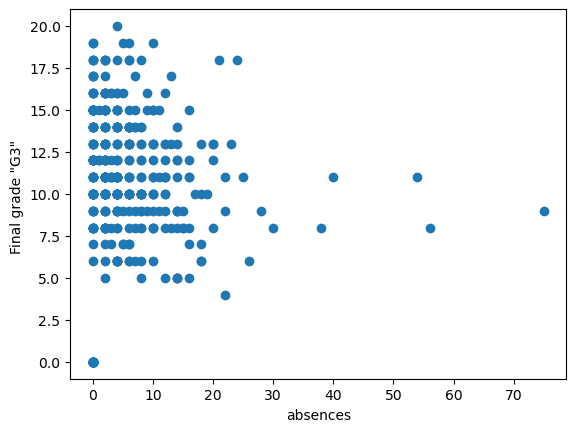

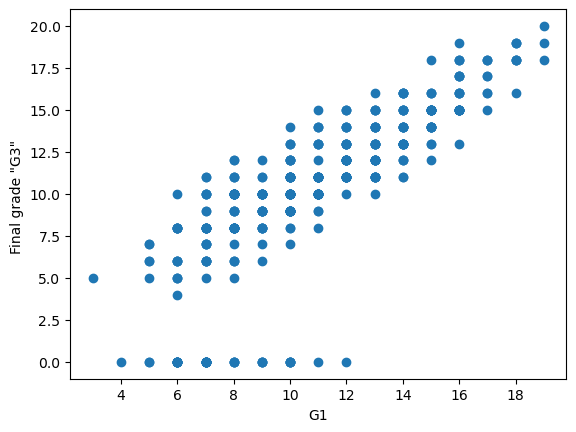

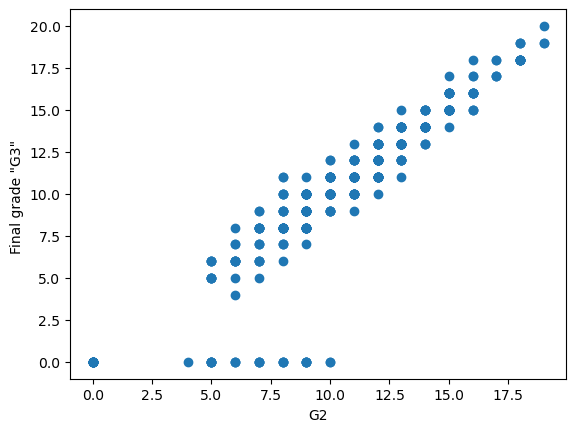

In [7]:
cols = list(dataset.columns)
for label in cols[29:-1]:
    plt.scatter(dataset[label],dataset['G3'])
    plt.xlabel(label)
    plt.ylabel('Final grade "G3" ')
    plt.show()

In [8]:
# sns.pairplot(dataset)
# plt.show()

# Feature Selection

In [9]:
['reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

#Top 10 Important Features
[(61.926627786991496, 'G2'),
 (22.441298825563567, 'G1'),
 (4.407955274256174, 'G2-G1'),
 (3.524307505971934, 'failures'),
 (1.9051637156389813, 'absences'),
 (0.6190987463963371, 'address'),
 (0.5295436974056238, 'reason'),
 (0.4723567359962737, 'Fjob'),
 (0.4188596048997435, 'Mjob'),
 (0.37041821141823517, 'guardian')]

#["Fedu","Medu","Pstatus","schoolsup","famsup","famrel","absences"]
       
cols=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']
dataset.drop(cols, inplace=True, axis=1)
dataset.head(10)

,failures,absences,G1,G2,G3
0,0,6,5,6,6
1,0,4,5,5,6
2,3,10,7,8,10
3,0,2,15,14,15
4,0,4,6,10,10
5,0,10,15,15,15
6,0,0,12,12,11
7,0,6,6,5,6
8,0,0,16,18,19
9,0,0,14,15,15


# Feature Engineering

In [10]:
# Difference between G1 and G2 exams (To caputre info about change in performance over time.)
dataset['G2-G1'] = dataset['G2']- dataset['G1']
column_index = dataset.columns.get_loc('G2') + 1 
dataset.insert(column_index, 'G2-G1', dataset.pop('G2-G1'))
dataset.head()

,failures,absences,G1,G2,G2-G1,G3
0,0,6,5,6,1,6
1,0,4,5,5,0,6
2,3,10,7,8,1,10
3,0,2,15,14,-1,15
4,0,4,6,10,4,10


In [11]:
# dataset['famsup']=(dataset['famsup']=='yes').astype(int)
# dataset['paid']=(dataset['paid']=='yes').astype(int)
# dataset['higher']=(dataset['higher']=='yes').astype(int)
# dataset['internet']=(dataset['internet']=='yes').astype(int)
# dataset['romantic']=(dataset['romantic']=='yes').astype(int)
dataset.head(10)

,failures,absences,G1,G2,G2-G1,G3
0,0,6,5,6,1,6
1,0,4,5,5,0,6
2,3,10,7,8,1,10
3,0,2,15,14,-1,15
4,0,4,6,10,4,10
5,0,10,15,15,0,15
6,0,0,12,12,0,11
7,0,6,6,5,-1,6
8,0,0,16,18,2,19
9,0,0,14,15,1,15


## Spliting the data

In [26]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state = 21)

## Model Training

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

## Mean Square Error

In [28]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
# Calculate the mean squared error  
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

3.6487355870950666
3.6219584731528114


## Model Accuracy

In [29]:
train_score = model.score(x_train,y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')
test_score = model.score(x_test,y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')

The Accuracy of training: 82.37 %
The Accuracy of testing: 83.12 %


## Feature Scaling

In [16]:
# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)

# Model Evaluation After Scaling

## Mean Square Error

In [17]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_train_pred=model.predict(x_train_scaled)
y_test_pred=model.predict(x_test_scaled)

# Calculate the mean squared error  
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

3.648735587095066
3.7344445614456405


## Model Accuracy

In [18]:
train_score = model.score(x_train_scaled,y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')
test_score = model.score(x_test_scaled,y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')

The Accuracy of training: 82.37 %
The Accuracy of testing: 82.59 %


# Support Vector Machine

In [19]:
model_svr = SVR(kernel='linear', C=1.0, epsilon=1.0)
model_svr.fit(x_train,y_train)

SVR(epsilon=1.0, kernel='linear')

In [20]:
train_score = model_svr.score(x_train, y_train)
print(f'Traning set: {round((train_score*100),2)} %')
test_score = model_svr.score(x_test, y_test)
print(f'Testing set: {round((test_score*100),2)} %')

Traning set: 81.13 %
Testing set: 82.14 %


# Decision Tree

In [21]:
model_DT = DecisionTreeRegressor( )
model_DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
train_score = model_DT.score(x_train, y_train)
print(f'The Accuracy of training after scaling: {round(train_score * 100, 2)} %')

test_score = model_DT.score(x_test, y_test)
print(f'The Accuracy of testing after scaling: {round(test_score * 100, 2)} %')

The Accuracy of training after scaling: 98.84 %
The Accuracy of testing after scaling: 70.56 %


In [23]:
model_DT_scaled = DecisionTreeRegressor()
model_DT_scaled.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [24]:
train_score_scaled = model_DT_scaled.score(x_train_scaled, y_train)
print(f'The Accuracy of training after scaling: {round(train_score_scaled * 100, 2)} %')

test_score_scaled = model_DT_scaled.score(x_test_scaled, y_test)
print(f'The Accuracy of testing after scaling: {round(test_score_scaled * 100, 2)} %')

The Accuracy of training after scaling: 98.84 %
The Accuracy of testing after scaling: 69.99 %


# Model Persistence

In [30]:
joblib.dump(model,'student_performance_model.joblib')

['filename.joblib']